# Codecademy Project
### Course: Data Science Foundation
#### Class: Data Visualization
---------
## Life Expectancy and GDP

### Project Goals
The main goal of this project is to perform an Exploratory Data Analysis (EDA) around the information regarding Life Expectancy and Gross Domestic Product (GDP) for 6 different countries between the years of 2000 and 2015.

With this information, we'll be able to: 
- Find if there's a correlation between the given variables;
- Understand the evolution in Life Expectancy and GDP over the years for each country;
- Compare the variables between countries.

### Dataset
The dataset provided has the following columns of data:

- **Country** - nation
- **Year** - the year for the observation
- **Life expectancy at birth (years)** - life expectancy value in years
- **GDP** - Gross Domestic Product in U.S. dollars

### Analysis

- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [215]:
df = pd.read_csv('all_data.csv')
# Shorten names in columns and observations
df.rename(columns={'Life expectancy at birth (years)': 'LEB'}, inplace=True)
df.replace('United States of America', 'USA', inplace=True)
# Create a list of countries
countries = df['Country'].unique().tolist()
# Define the colors for the plots
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive']
custom_palette = dict([(country, color) for country, color in zip(countries, colors)])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LEB      96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [164]:
df

,Country,Year,LEB,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


In [4]:
df.describe()

,Year,LEB,GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [165]:
df.Country.value_counts()

Chile       16
China       16
Germany     16
Mexico      16
USA         16
Zimbabwe    16
Name: Country, dtype: int64

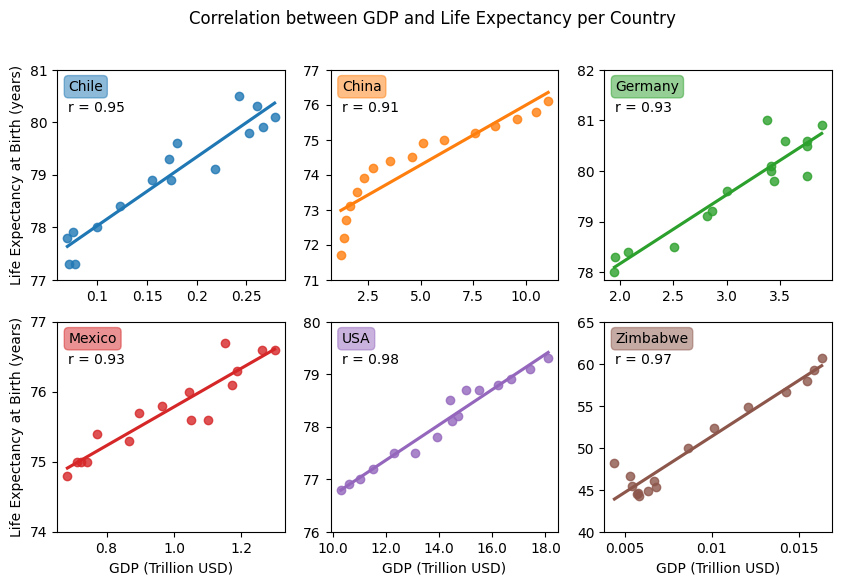

In [166]:
# Define figure grid and its title
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(10,6))
axs = [ax1, ax2, ax3, ax4, ax5, ax6]
fig.suptitle('Correlation between GDP and Life Expectancy per Country')

for i, (ax, country) in enumerate(zip(axs, countries)):
    data = df[df['Country'] == country]
    # Plot each graph separated
    ax = plt.subplot(2, 3, i + 1)
    g = sns.regplot(data, x='GDP', y='LEB', ci=False, color=colors[i])
    plt.annotate(country, xy=(0.05, 0.9), xycoords='axes fraction', bbox=dict(boxstyle="round", fc=colors[i], ec=colors[i], alpha=0.5))
    # Find and plot Pearson Correlation (r) for each graph
    r = stats.pearsonr(data.GDP, data.LEB)[0]
    plt.annotate(f'r = {r :.2f}', xy=(0.05, 0.8), xycoords='axes fraction')
    # Transform X-axis in Trillion USD and normalize their ticks
    xticks = g.get_xticks()
    xlabels = [tick / 1e12 for tick in xticks]
    plt.xticks(ticks=xticks[1:-1], labels=xlabels[1:-1])
    # Transform Y-axis labels in integers
    yticks = [*set([round(tick) for tick in g.get_yticks()])]
    g.set(yticks=yticks)
    # Remove X and Y labels from graphs in the middle
    if ax in [ax1, ax4]:
        plt.ylabel('Life Expectancy at Birth (years)')
    else:
        plt.ylabel('')
    if ax in [ax4, ax5, ax6]:
        plt.xlabel('GDP (Trillion USD)')
    else:
        plt.xlabel('')

**Analysis:** We can observe a high correlation between GDP and Life Expectancy at Birth in all 6 cases. For every country the Pearson Correlation Coefficient (r) was higher than 0.9, which means a very high and positive correlation between the variables. Regardless of the huge difference in GDP and Life Expectancy between each country, we can always observe the same high positive correlation.

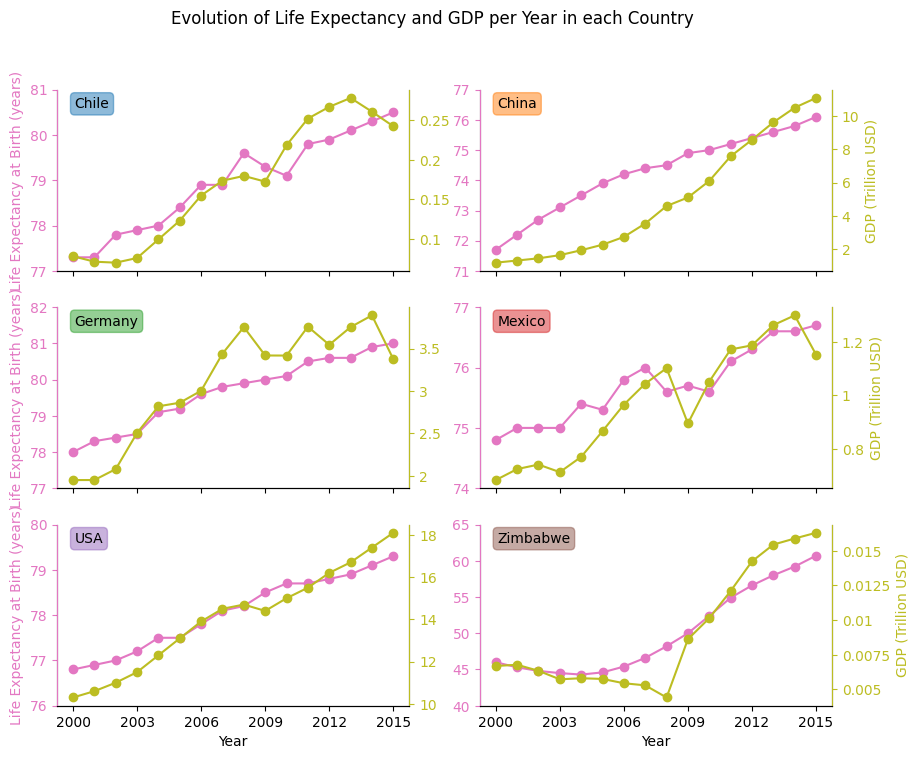

In [167]:
# Define figure grid and its title
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 8))
axs = [ax1, ax2, ax3, ax4, ax5, ax6]
fig.suptitle('Evolution of Life Expectancy and GDP per Year in each Country')

for i, (ax, country) in enumerate(zip(axs, countries)):
    data = df[df['Country'] == country]
    # Plot each graph separated
    g1 = plt.subplot(3, 2, i + 1)
    plt.annotate(country, xy=(0.05, 0.9), xycoords='axes fraction', bbox=dict(boxstyle="round", fc=colors[i], ec=colors[i], alpha=0.5))
    # Plot Life Expectancy x Year
    g1.plot('Year', 'LEB', data=data, color=colors[-2], marker='o')
    g1.set_xticks(range(2000, 2016, 3))
    # Plot GDP x Year
    g2 = g1.twinx()
    g2.plot('Year', 'GDP', data=data, color=colors[-1], marker='o')
    # Transform LEB-axis labels in integers
    leb_ticks = [*set([round(tick) for tick in g1.get_yticks()])]
    g1.set(yticks=leb_ticks)
    # Transform GDP-axis in Trillion USD and normalize their ticks
    gdp_ticks = g2.get_yticks()
    gdp_labels = [tick / 1e12 for tick in gdp_ticks]
    gdp_labels = [int(tick) if tick % int(tick) == 0 else tick for tick in gdp_labels]
    g2.set(yticks=gdp_ticks[1:-1], yticklabels=gdp_labels[1:-1])
    # Set Y labels' colors
    g1.tick_params(axis='y', colors=colors[-2])
    g2.spines['left'].set_color(colors[-2])
    g2.tick_params(axis='y', colors=colors[-1])
    g2.spines['right'].set_color(colors[-1])
    # Remove top spine
    g1.spines['top'].set_visible(False)
    g2.spines['top'].set_visible(False)
    # Set X and Y labels from graphs in the corners
    if ax in [ax1, ax3, ax5]:
        g1.set_ylabel('Life Expectancy at Birth (years)', color=colors[-2])
    if ax in [ax5, ax6]:
        g1.set_xlabel('Year')
    if ax in [ax2, ax4, ax6]:
        g2.set_ylabel('GDP (Trillion USD)', color=colors[-1])
    if ax in [ax1, ax2, ax3, ax4]:
        g1.set_xticklabels('')

**Analysis:** Here we can observe an increase in GDP and Life Expectancy over the years for each country separately. Reinforcing the correlation between those variables.

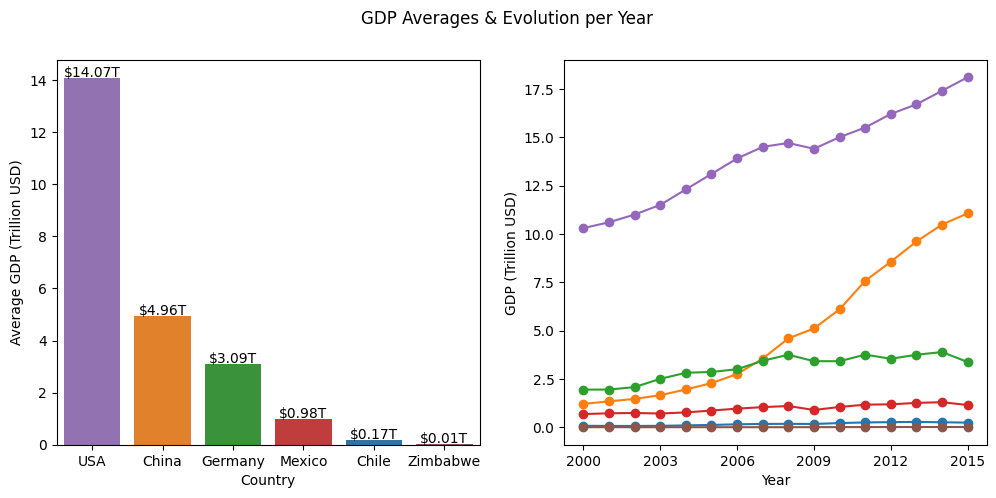

In [327]:
# Define figure grid and its title
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
plt.suptitle('GDP Averages & Evolution per Year')

# Find average GDP for each country
gdp_means = df.groupby('Country')['GDP'].mean().sort_values(ascending=False)
# Bar plot
ax1 = plt.subplot(121)
sns.barplot(x=gdp_means.index, y=gdp_means.values, palette=custom_palette)
# Change Y-axis' label to Trillion USD
ax1.set_ylabel('Average GDP (Trillion USD)')
yticks = ax1.get_yticks()
yticklabels = [round(tick / 1e12) for tick in yticks]
ax1.set(yticks=yticks[:-1], yticklabels=yticklabels[:-1])
# Include values for each bar
for label in ax1.get_xticklabels():
    xtick = label.get_position()[0]
    xlabel = label.get_text()
    ax1.text(x=xtick, y=gdp_means[xlabel] + 0.05e12, s=f"${gdp_means[xlabel] / 1e12 :.2f}T", horizontalalignment='center')

for country in countries:
    data = df[df['Country'] == country]
    # Plot lines on second graph
    ax2 = plt.subplot(122)
    plt.plot(data.Year, data.GDP, marker='o', label=country)

# Change Y-axis' labels and tick values
ax2.set_ylabel('GDP (Trillion USD)')
ax2.set_yticks(ticks=np.arange(0, 18.5e12, 2.5e12), labels=np.arange(0, 18.5, 2.5))
ax2.set_xlabel('Year')
ax2.set_xticks(range(2000, 2016, 3));

**Analysis:** We can notice an enormous difference between the United States average GDP and the rest of the group, Zimbabwe and Chile's GDPs seem to be almost inexistent in both graphs, given the scale of the graph in Trillions of US Dollars. Another important observation is Chinese GDP growth over the year, starting at 3rd place and close to the rest of the group and exponentially growing to achieve second place and completely diverge from the initial group, getting closer to the USA.

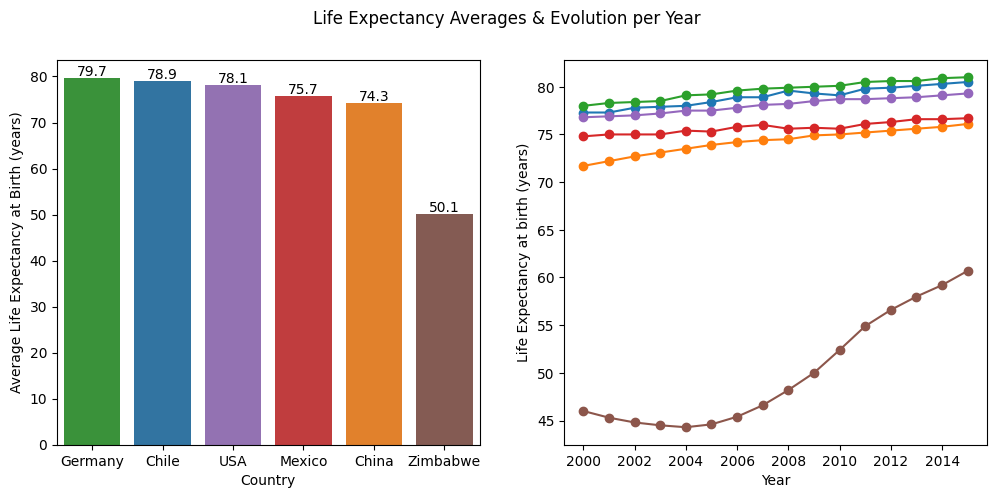

In [307]:
# Define figure grid and its title
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
plt.suptitle('Life Expectancy Averages & Evolution per Year')

# Find average Life Expectancy for each country
leb_means = df.groupby('Country')['LEB'].mean().sort_values(ascending=False)
# Bar plot
ax1 = plt.subplot(121)
sns.barplot(x=leb_means.index, y=leb_means.values, palette=custom_palette)
ax1.set_ylabel('Average Life Expectancy at Birth (years)')
# Include values for each bar
for label in ax1.get_xticklabels():
    xtick = label.get_position()[0]
    xlabel = label.get_text()
    ax1.text(x=xtick, y=leb_means[xlabel] + 0.5, s=f"{leb_means[xlabel] :.1f}", horizontalalignment='center')

# Line chart
for country in countries:
    data = df[df['Country'] == country]
    # Plot lines on second graph
    ax2 = plt.subplot(122)
    plt.plot(data.Year, data.LEB, marker='o')

ax2.set_ylabel('Life Expectancy at birth (years)')
ax2.set_xlabel('Year');


**Analysis:** Plotting every country's Life Expectancy in the same graph shows a huge difference between Zimbabwe, which averages 50 years of life, and the other countries, which averages around 77 years of life. This distance is very alarming and raises a concern around the country's quality of life.

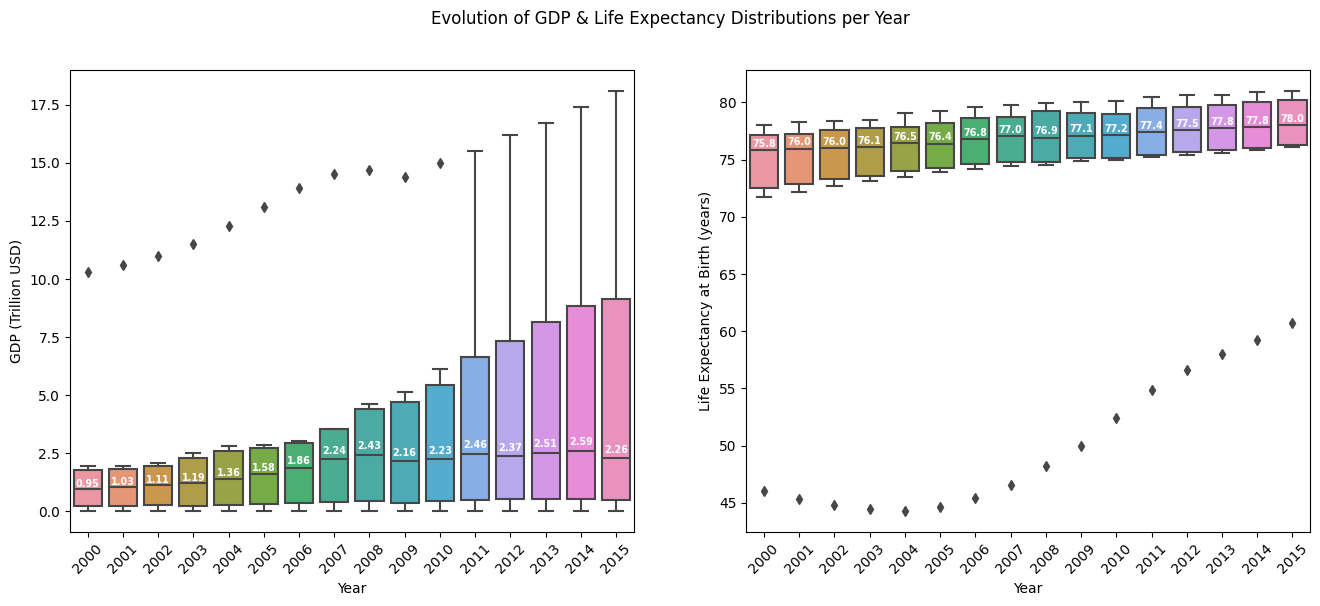

In [290]:
# Define figure grid and its title
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Evolution of GDP & Life Expectancy Distributions per Year')

# Box plot: GDP per Year
axs[0] = plt.subplot(121)
g1 = sns.boxplot(data=df, x='Year', y='GDP')
g1.set_ylabel('GDP (Trillion USD)')
plt.xticks(rotation=45)
# Change Y-axis labels to the Trillion scale
yticks = g1.get_yticks()
ylabels = [tick / 1e12 for tick in yticks]
plt.yticks(ticks=yticks[1:-1], labels=ylabels[1:-1])
# Show median values in the graph
g1_medians = df.groupby(df['Year'])['GDP'].median()
g1_medians = [median / 1e12 for median in g1_medians]
for xtick in g1.get_xticks():
    g1.text(xtick, g1_medians[xtick] * 1.1e12, f'{g1_medians[xtick] :.2f}', horizontalalignment='center',size='x-small',color='w',weight='semibold')
    
# Box plot: Life Expectancy at Birth per Year
axs[1] = plt.subplot(122)
g2 = sns.boxplot(data=df, x='Year', y='LEB')
g2.set_ylabel('Life Expectancy at Birth (years)')
plt.xticks(rotation=45)
# Show median values in the graph
g2_medians = df.groupby(df['Year'])['LEB'].median()
for xtick in g2.get_xticks():
    g2.text(xtick, g2_medians.iloc[xtick] + 0.3, f'{g2_medians.iloc[xtick] :.1f}', horizontalalignment='center',size='x-small',color='w',weight='semibold');


**Anlysis:** In the first graph, we can see an increase in the medians of GDP until 2008, after that, in 2009 we can observe the decrease in the general GDP, reflex of the financial crisis of 2008, and some difficulty of the median to get back on track until the end of the graph. Also, it's noticeable the upper bound outlier, which shows that the United States are very far from the rest of the countries in terms of GDP. One last observation is that the interquartile range has increased year after year, giving us the false sense that the other countries where getting closer to the USA, but when we analyze the individual graphs we can see that it's actually the Chinese GDP that's growing out of the lower bound group and getting closer, alone, to the American GDP. In the second graph, we can observe an increase in the medians of Life Expectancies over the years, as well as a decrease in the interquartile range. Which means that the Life Expectancies of the countries in this dataset where getting higher and closer each year. It's notorious the lower bound outliers in this graph, showing that Zimbabwe's Life Expectancy is very dissonant from the rest of the countries in this dataset.

In [291]:
df_growth = df.sort_values(by='Year').groupby('Country')\
            .agg(gdp_growth=('GDP', lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0]),
                 leb_growth=('LEB', lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0]))
display(df_growth)

,gdp_growth,leb_growth
Country,,
Chile,2.114758,0.041397
China,8.134189,0.061367
Germany,0.731126,0.038462
Mexico,0.685458,0.025401
USA,0.757282,0.032552
Zimbabwe,1.437186,0.319565


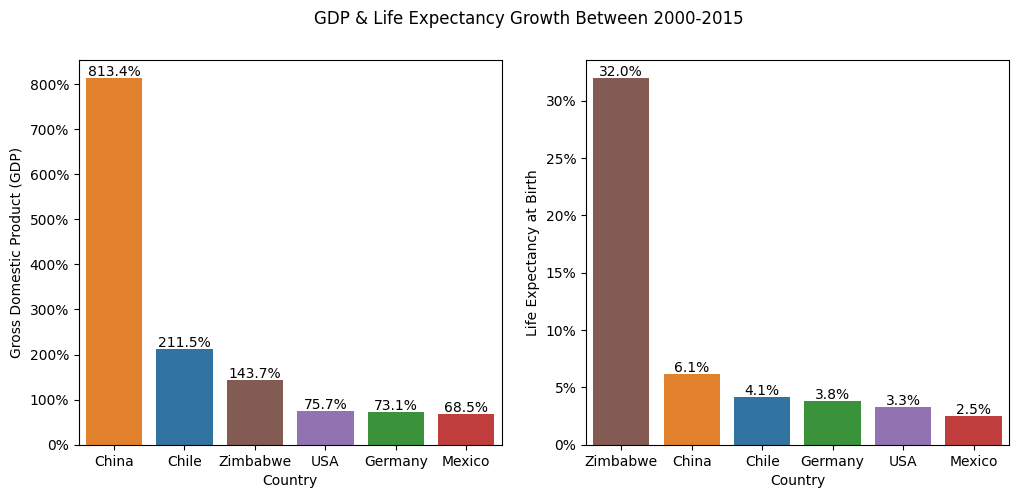

In [328]:
# Define figure grid and its title
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('GDP & Life Expectancy Growth Between 2000-2015')

# Plot GDP Bar Graph
ax1 = plt.subplot(121)
order = [country for country in df_growth.sort_values(by='gdp_growth', ascending=False).index]
sns.barplot(x=df_growth.index, y=df_growth.gdp_growth, palette=custom_palette, order=order)
# Set Y-axis' labels to percentage
ax1.set_ylabel('Gross Domestic Product (GDP)')
yticks = ax1.get_yticks()
ylabels = [f'{tick * 100 :.0f}%' for tick in yticks]
ax1.set(yticks=yticks[:-1], yticklabels=ylabels[:-1])
# Include values for each bar
for label in ax1.get_xticklabels():
    xtick = label.get_position()[0]
    xlabel = label.get_text()
    ax1.text(x=xtick, y=df_growth.loc[xlabel, 'gdp_growth'] + 0.05, s=f"{df_growth.loc[xlabel, 'gdp_growth'] * 100 :.1f}%", horizontalalignment='center')

# Plot Life Expectancy Bar Graph
ax2 = plt.subplot(122)
order = [country for country in df_growth.sort_values(by='leb_growth', ascending=False).index]
sns.barplot(x=df_growth.index, y=df_growth.leb_growth, palette=custom_palette, order=order)
# Set Y-axis' labels to percentage
ax2.set_ylabel('Life Expectancy at Birth')
yticks = ax2.get_yticks()
ylabels = [f'{tick * 100 :.0f}%' for tick in yticks]
ax2.set(yticks=yticks[:-1], yticklabels=ylabels[:-1])
# Include values for each bar
for label in ax2.get_xticklabels():
    xtick = label.get_position()[0]
    xlabel = label.get_text()
    ax2.text(x=xtick, y=df_growth.loc[xlabel, 'leb_growth'] + 0.002, s=f"{df_growth.loc[xlabel, 'leb_growth'] * 100 :.1f}%", horizontalalignment='center');

**Analysis:** In the first graph, China calls the attention showing more than 800% growth in GDP between 2000-2015, almost 4x greater than the second place and 12x greater than the last one. Which is really impressive, given the fact that it was close to the rest of the group at the beginning, as seen before. We can also remark that China is second place on Life Expectany's growth, reinforcing the correlation factor between those indices. Looking to the Life Expectancy's Growth, Zimbabwe is now catching the eyes with a 32% growth over 15 years, 5x times greater than China and almost 13x greater than Mexico. Which is magnificent, especially given the fact that it was very far from the rest of the group.